<a href="https://colab.research.google.com/github/IanTirok/KNN-and-Naive-Bayes-practice/blob/main/Moringa_Data_Science_Core_Module_2_W4_Independent_Project_2021_08_Ian_Tirok_Python_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### Understanding the Context

The RMS Titanic was a luxury British steamship that sank in the early hours of April,15 1912 after striking an iceberg leading to the deaths of more than 1500 passengers and crew. Of the 2240 passengers and crew on board, more than 1500 lost their lives in the disaster. 

The Titanic started its maiden voyage from Southampton, England on April,10, 1912. After stops in Cherbough, France and Queenstown, Ireland, the ship set sail for New York with 2,240 passengers and crew. The ship had high-ranking officials, wealthy industrialists, dignitaries and celebrities. 706 people survived the sinking of the Titanic. 


### Specifying the Question

I will be using the K-Nearest Neighbors for my analysis. I will us grid search cv to improve the accuracy of the base model through different metrics used such as the minkowski and the manhattan.

While there was some element of luck involved in surviving it seems some groups of people were more likely to survive than others. 

### Metrics for Success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 80%.

### The Experimental Design

The experimental design for this project is as follows:


*   Loading the libraries and dataset
*   Data cleaning and preparation
*   Performing the Univariate analysis
*   Performing the Bivariate analysis
*   Performing the Multivariate analysis
*   Applying the K - Nearest Neighbor algorithms
*   Applying the GridSearch CV to test through different parameters
*   Making predictions using the different models that I've created
*   Assesing the accuracy of the models created
*   Making conclusions and challenging the solution




## 2. Reading the Data

In [ ]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
# Loading the Train Data from the source i.e. csv
# ---
source = '/content/drive/MyDrive/Core Module 2 Wk 4 IP/train (5).csv'
# ---
#

df = pd.read_csv(source)
df = df.set_index('PassengerId')

In [ ]:
# Loading the Test Data from the source i.e. csv
# ---
source = '/content/drive/MyDrive/Core Module 2 Wk 4 IP/test (1).csv'
# ---
#

test = pd.read_csv(source)
test = test.set_index('PassengerId')

## 3. Checking the Data

###*Train dataset*

In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [ ]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [ ]:
df.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
321,0,3,"Dennis, Mr. Samuel",male,22.00,0,0,A/5 21172,7.25,NaN,S


In [ ]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

###*Test dataset*

In [ ]:
test.shape

(418, 10)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [ ]:
test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.05,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1308,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.05,NaN,S
1309,3,"Peter, Master. Michael J",male,nan,1,1,2668,22.36,NaN,C


In [ ]:
test.sample()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1223,1,"Dulles, Mr. William Crothers",male,39.00,0,0,PC 17580,29.70,A18,C


In [ ]:
test.nunique()

Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

## 4. Tidying the Dataset

###*Train dataset*

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

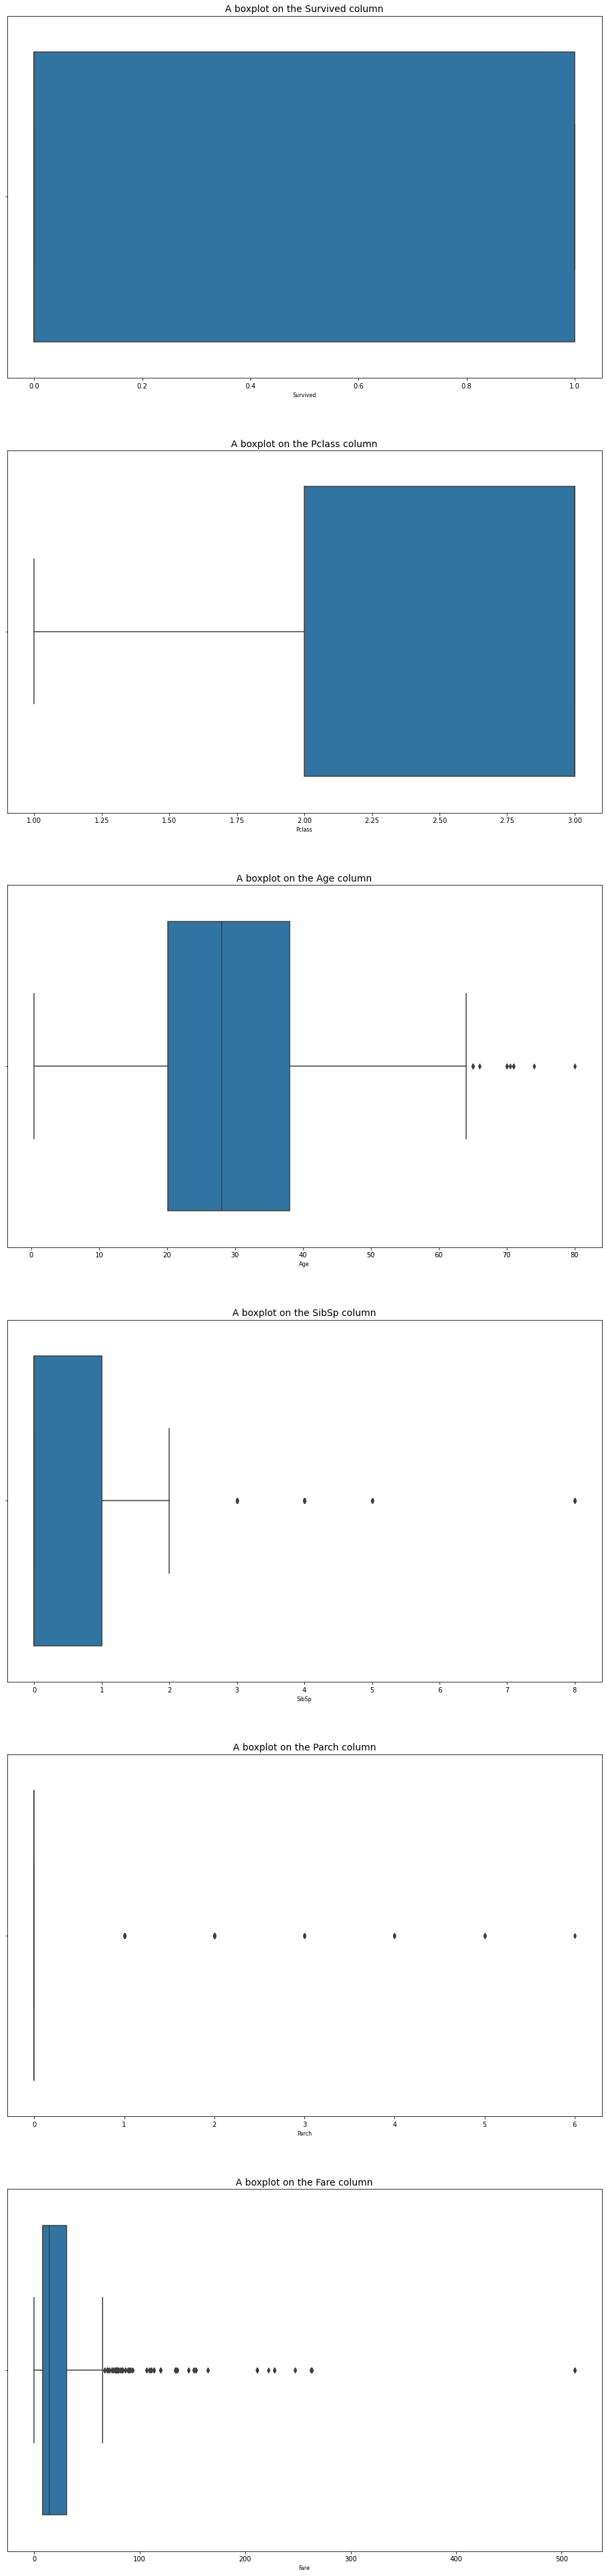

In [ ]:
# Checking for Outliers


col_names = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
#There seems to be very many outliers but lets count them to be sure

df1 = df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


Survived      0
Pclass        0
Age          11
SibSp        46
Parch       213
Fare        116
dtype: int64

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
# Dealing with the Missing Data
# There are 687 missing records in the cabin column, The missing data seems to be too much for it to help in our analysis. Therefore I will drop the column
# There are only 2 missing records in the Embarked column, I will drop the 2 entries
#Filling the missing ages with the mean in the age in the train data

df['Age'].fillna(df['Age'].mean(),inplace=True)
df = df.drop(columns=['Cabin'])
df = df.dropna()

In [ ]:
# Identifying the duplicate Data

len(df)-len(df.drop_duplicates())

0

In [ ]:
# Dealing with the Duplicate Data
# They are no duplicate records, we can procceed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [ ]:
# More data cleaning procedures

#Encoding columns
# encoding the Sex column

cat_cols = ['Sex']

# looping through the columns to encode
for col in cat_cols:

# encoding the sex column
  cat_enc = {'Sex':{'male':0,'female':1}}

df.replace(cat_enc, inplace=True)

df['Sex'].astype(int)

# encoding the Embarked column

cat_cols = ['Embarked']

# looping through the columns to encode
for col in cat_cols:

# encoding the embarked column
  cat_enc = {'Embarked':{'Q':0,'S':1, 'C':2}}

df.replace(cat_enc, inplace=True)

df['Embarked'].astype(int)
# checking to see if the changes have been effected
df.head()


#I don't see how we will use the name or ticket column so we caan procceed to delete it
df = df.drop(columns=['Name'])
df = df.drop(columns=['Ticket'])


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.00,1,0,7.25,1
2,1,1,1,38.00,1,0,71.28,2
3,1,3,1,26.00,0,0,7.92,1
4,1,1,1,35.00,1,0,53.10,1
5,0,3,0,35.00,0,0,8.05,1


In [ ]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
df.shape

(889, 8)

###*Test dataset*

In [ ]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

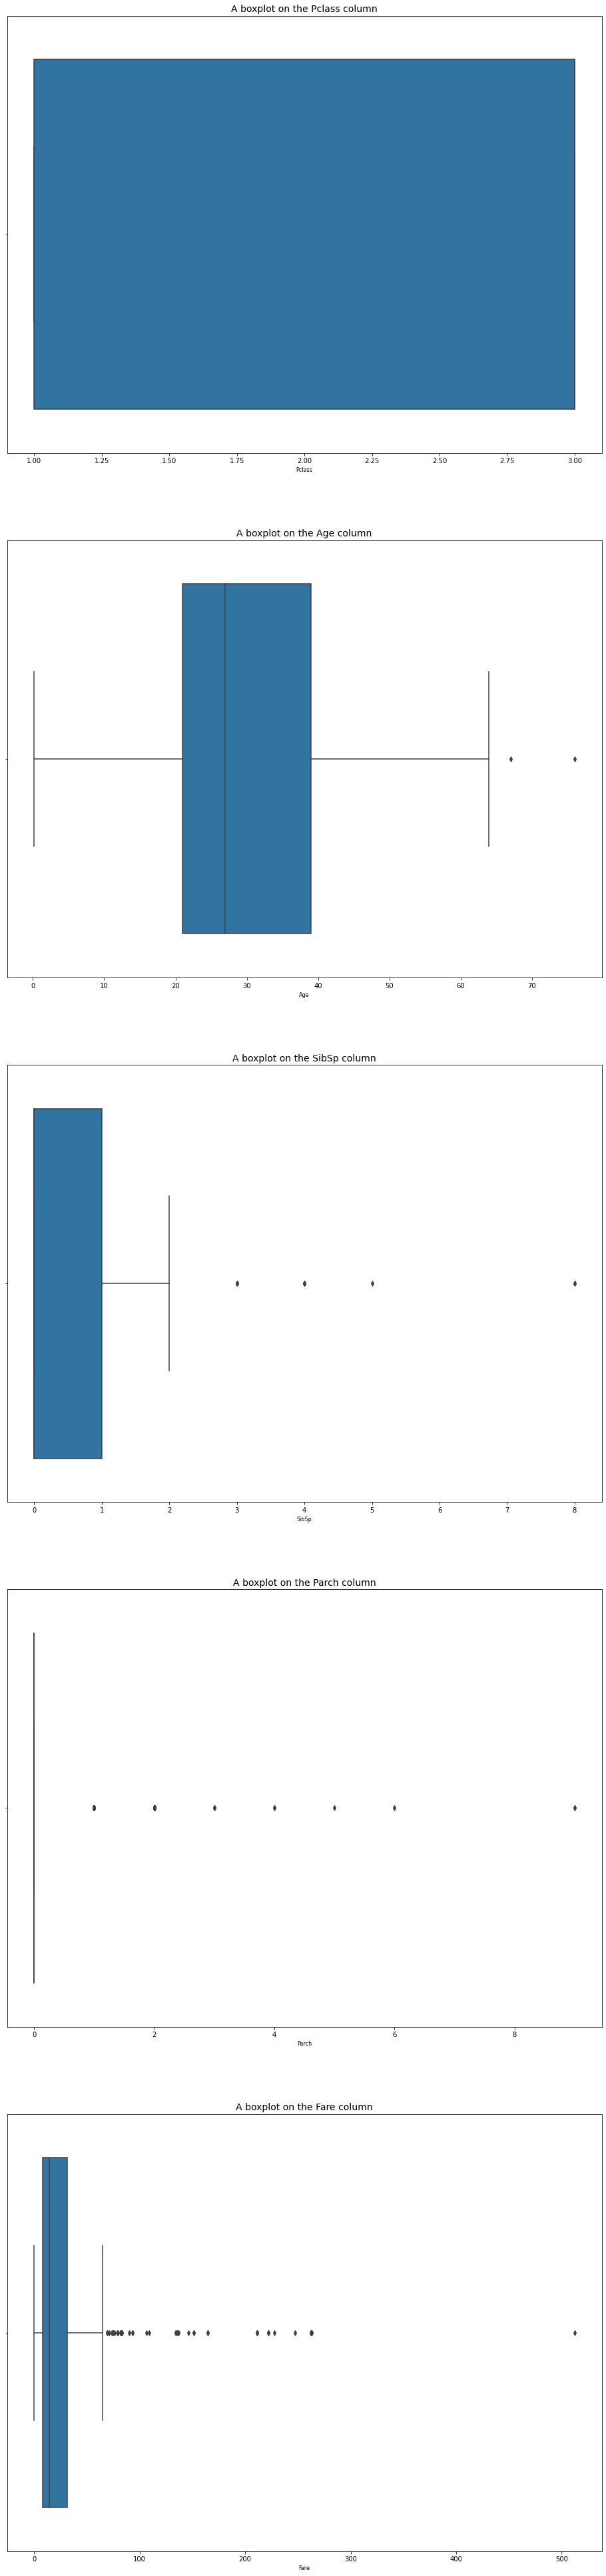

In [ ]:
# Checking for Outliers


col_names = [ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = test[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
#There seems to be very many outliers but lets count them to be sure

test1 = test[[ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
Q1 = test1.quantile(0.25)
Q3 = test1.quantile(0.75)
IQR = Q3 - Q1
((test1 < (Q1 - 1.5 * IQR)) | (test1 > (Q3 + 1.5 * IQR))).sum()


Pclass     0
Age        2
SibSp     11
Parch     94
Fare      55
dtype: int64

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [ ]:
# Identifying the Missing Data
#
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
test.shape

(418, 10)

In [ ]:
# Dealing with the Missing Data
# There are 327 missing records in the cabin column, The missing data seems to be too much for it to help in our analysis. Therefore I will drop the column
# There is only 1 missing record in the fare column. we can drop the record
#Filling the missing ages with the mean in the age in the train data

test['Age'].fillna(test['Age'].mean(),inplace=True)
test = test.drop(columns=['Cabin'])
test = test.dropna()

In [ ]:
# Identifying the duplicate Data

len(test)-len(test.drop_duplicates())

0

In [ ]:
# Dealing with the Duplicate Data
# They are no duplicate records, we can procceed


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Name      417 non-null    object 
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Ticket    417 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.6+ KB


In [ ]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S


In [ ]:
# More data cleaning procedures

#Encoding columns
# encoding the Sex column

cat_cols = ['Sex']

# looping through the columns to encode
for col in cat_cols:

# encoding the sex column
  cat_enc = {'Sex':{'male':0,'female':1}}

test.replace(cat_enc, inplace=True)

test['Sex'].astype(int)

# encoding the Embarked column

cat_cols = ['Embarked']

# looping through the columns to encode
for col in cat_cols:

# encoding the embarked column
  cat_enc = {'Embarked':{'Q':0,'S':1, 'C':2}}

test.replace(cat_enc, inplace=True)

test['Embarked'].astype(int)
# checking to see if the changes have been effected
test.head()


#I don't see how we will use the name column so we caan procceed to delete it
test = test.drop(columns=['Name'])
test = test.drop(columns=['Ticket'])

test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.50,0,0,7.83,0
893,3,1,47.00,1,0,7.00,1
894,2,0,62.00,0,0,9.69,0
895,3,0,27.00,0,0,8.66,1
896,3,1,22.00,1,1,12.29,1


In [ ]:
#Standardizing column names

test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
test.shape

(417, 7)

## 5. Exploratory Analysis

###Measures of central tendancy


In [ ]:
#getting summary
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.00,889.00,889.00,889.00,889.00,889.00,889.00,889.00
mean,0.38,2.31,0.35,29.65,0.52,0.38,32.10,1.10
std,0.49,0.83,0.48,12.97,1.10,0.81,49.70,0.52
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,22.00,0.00,0.00,7.90,1.00
50%,0.00,3.00,0.00,29.70,0.00,0.00,14.45,1.00
75%,1.00,3.00,1.00,35.00,1.00,0.00,31.00,1.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33,2.00


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

What is the most appearing number in each column?

In [ ]:
# Mode
# Calculating mode across different columns

a = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']].mode().head(1)

arr = a.to_numpy()
arr


array([[ 0.        ,  3.        ,  0.        , 29.69911765,  0.        ,
         0.        ,  8.05      ,  1.        ]])

In [ ]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',  'fare',
       'embarked'], 
       'The most appearing record': [0.0, 3.0, 0.0, 29.69911764705882, 0.0, 0.0, 8.05, 'S']} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,survived,0.00
1,pclass,3.00
2,sex,0.00
3,age,29.70
4,sibsp,0.00
5,parch,0.00
6,fare,8.05
7,embarked,S


What is the average of each column

In [ ]:
# Mean

# Calculating mean across different columns

a = df.mean()

a
a
b = pd.DataFrame(a)
b

,0
survived,0.38
pclass,2.31
sex,0.35
age,29.65
sibsp,0.52
parch,0.38
fare,32.10
embarked,1.10


What is the middle record of each column

In [ ]:
# Median
# Calculating the median for across different columns

a = df.median()

a
b = pd.DataFrame(a)
b

,0
survived,0.00
pclass,3.00
sex,0.00
age,29.70
sibsp,0.00
parch,0.00
fare,14.45
embarked,1.00


### Measures of Dispersion

In [ ]:
#Range for the respective columns
col = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

x = {}

for col in col:
    x[col] = df[col].max()- df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], 
       'The range is': [1.    ,   2.    ,   1.    ,  79.58  ,   8.    ,   6.    ,
      512.3292]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The range is
0,survived,1.00
1,pclass,2.00
2,sex,1.00
3,age,79.58
4,sibsp,8.00
5,parch,6.00
6,fare,512.33


What is the spread from mean for each column. lets calculate standard deviation

In [ ]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean
col = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
x = {}
for col in col:
    x[col] = df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], 
       'The standard deviation is': [ 0.48625969,  0.83469978,  0.47753789, 12.96836631,  1.10370488,
       0.80676074, 49.69750432]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,survived,0.49
1,pclass,0.83
2,sex,0.48
3,age,12.97
4,sibsp,1.10
5,parch,0.81
6,fare,49.70


Lets calculate the average squared deviation of each number from the mean of the data set

In [ ]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
col = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
x = {}
for col in col:
    x[col] = df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], 
         'The variance is': [2.36448484e-01, 6.96723720e-01, 2.28042441e-01, 1.68178525e+02,
      1.21816445e+00, 6.50862899e-01, 2.46984194e+03]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,survived,0.24
1,pclass,0.70
2,sex,0.23
3,age,168.18
4,sibsp,1.22
5,parch,0.65
6,fare,2469.84


In [ ]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data
col = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
x = {}

for col in col:
    x[col] = df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], 
         'The kurtosis is': [-1.76917945, -1.26943748, -1.61222491,  0.97900655, 17.83897238,
       9.75059171, 33.50847727]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,survived,-1.77
1,pclass,-1.27
2,sex,-1.61
3,age,0.98
4,sibsp,17.84
5,parch,9.75
6,fare,33.51


Our columns seem to have high kurotsis. This may be an indication of to the data having heavy tails, or outliers.

The age and t4u columns seems to be normally distributed. Lets have a closer look in the visualizations below

In [ ]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
for col in col:
    x[col] = df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], 
         'The Skew is': [0.48456763, -0.63699776,  0.62562546,  0.43172026,  3.69105763,
       2.74516013,  4.80144021]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,survived,0.48
1,pclass,-0.64
2,sex,0.63
3,age,0.43
4,sibsp,3.69
5,parch,2.75
6,fare,4.80


In such a distribution, usually (but not always) the mean is greater than the median, or equivalently, the mean is greater than the mode; in which case the skewness is greater than zero.

Only age has a negative skew in our data

###Visualisation

###Univariate

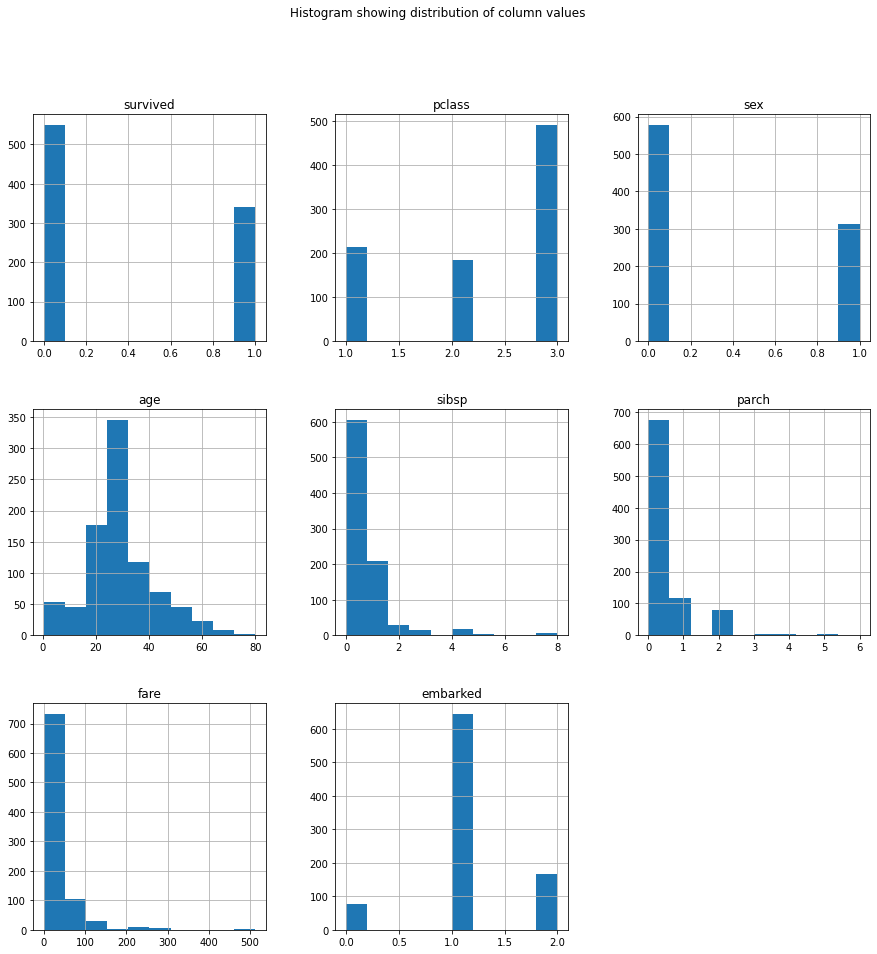

In [ ]:

df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of column values")
plt.savefig('Histogram')
plt.show()

Lets have a closer look of the distribution here below

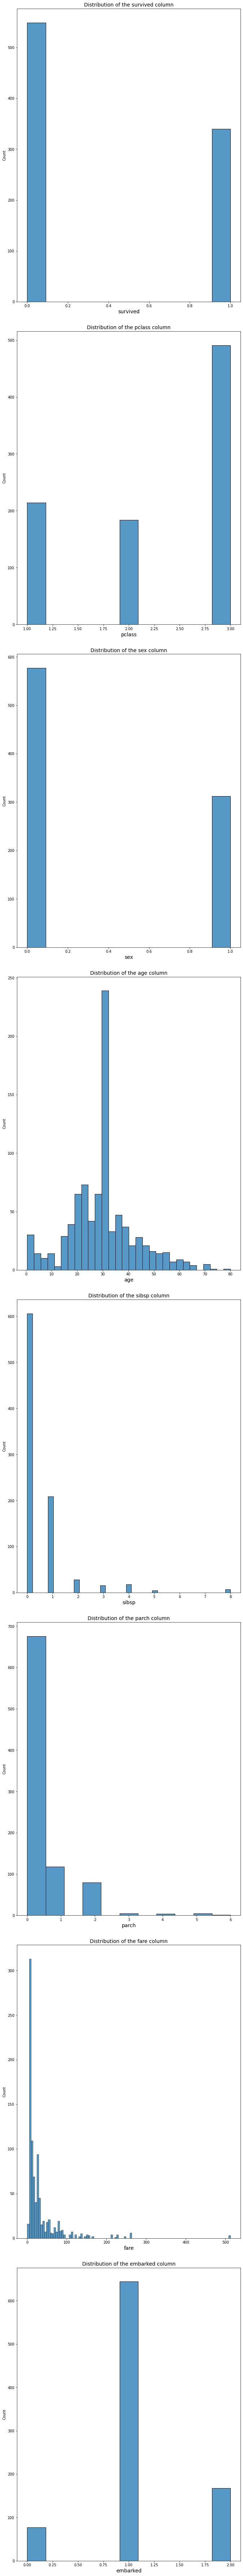

In [ ]:

col_names = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']
fig, ax = plt.subplots(len(col_names), figsize = (10,100))
for i, col_val in enumerate(col_names):

    sns.histplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

###Bivariate

Lets find out what effect of the independent variables have on survival of passengers

Our independent variables are;
 

1. embarked
2.  pclass
3.  sex
4.  age
5.  sibsp
6.  parch
7.  fare


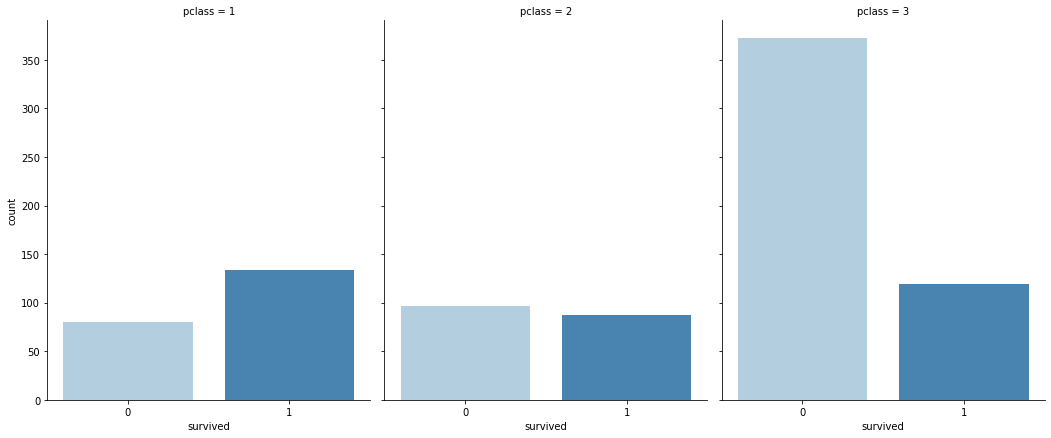

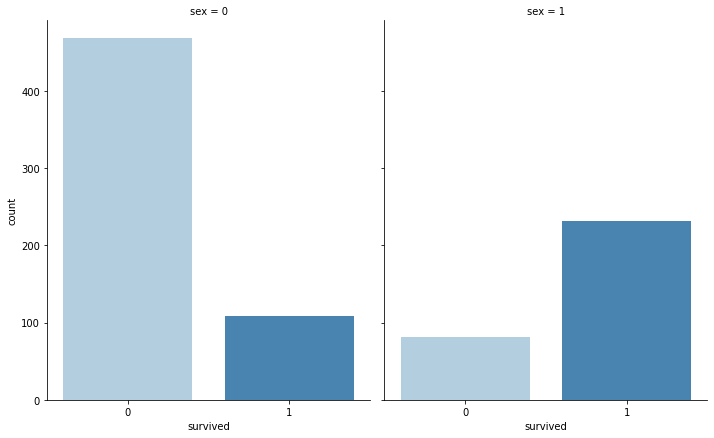

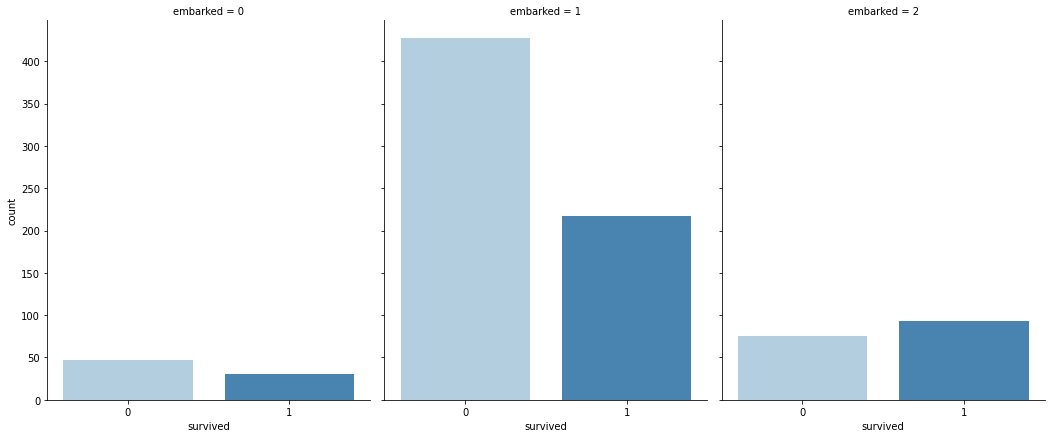

In [ ]:
sns.catplot("survived", col="pclass", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("survived", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("survived", col="embarked", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Blues')


plt.show()

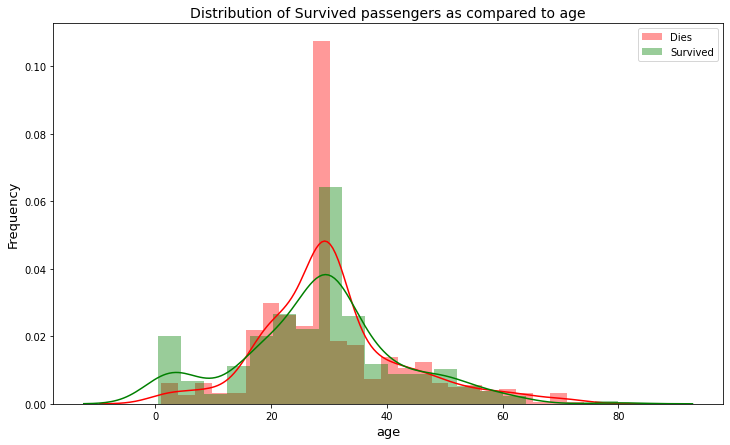

In [ ]:

# Plotting histogram to show distribution of survival as compared to age
# 
dies = df.loc[df.survived==0, 'age']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'age']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to age', fontsize = 14, color = 'k')
plt.xlabel('age', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

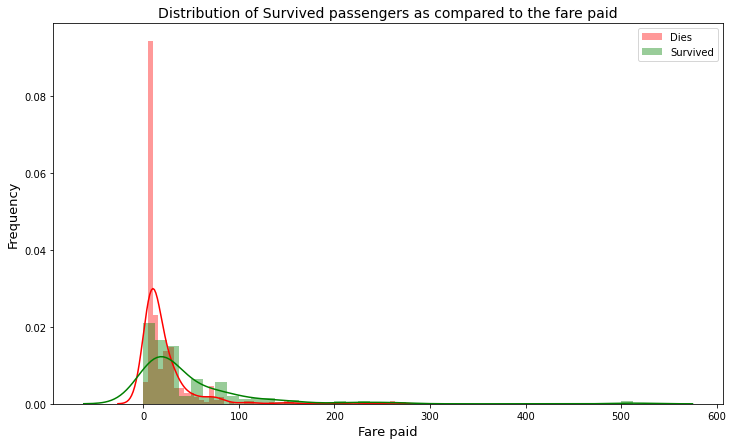

In [ ]:

# Plotting histogram to show distribution of survival as compared to fare paid
# 
dies = df.loc[df.survived==0, 'fare']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'fare']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to the fare paid', fontsize = 14, color = 'k')
plt.xlabel('Fare paid', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

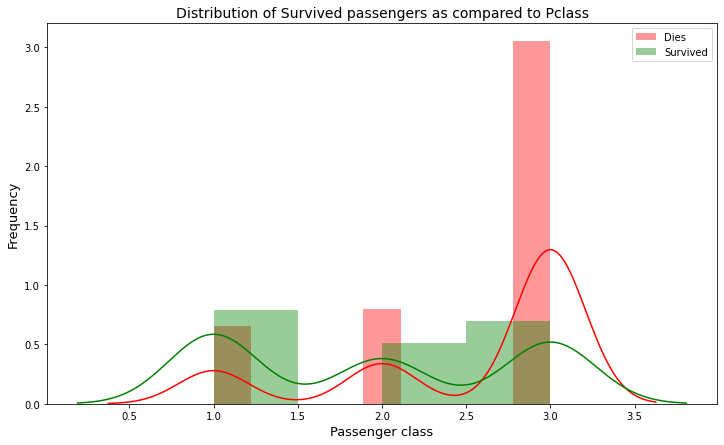

In [ ]:

# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'pclass']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'pclass']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to Pclass', fontsize = 14, color = 'k')
plt.xlabel('Passenger class', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

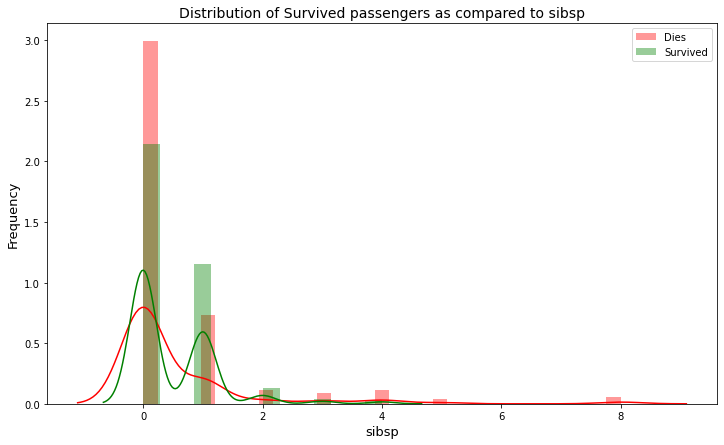

In [ ]:
# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'sibsp']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'sibsp']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to sibsp', fontsize = 14, color = 'k')
plt.xlabel('sibsp', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

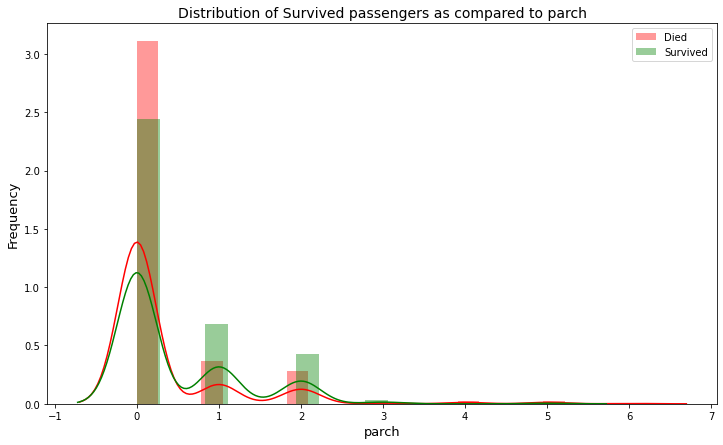

In [ ]:
# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'parch']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'parch']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Died")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to parch', fontsize = 14, color = 'k')
plt.xlabel('parch', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

Checking for Multi-Collinearity The key goal of regression analysis is to isolate the relationship between each independent variables and the independent variable. The coefficient estimates can swing wildly based on which other independent variables are in the model. Multi-collinearity reduces the precision of the estimate co-efficients which weakens the statistical power of the regression model and that is why it is important for us to remove the multicollinear variables to be able to build an efficient model.

In [ ]:

#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.00,-0.34,0.54,-0.07,-0.03,0.08,0.26,0.13
pclass,-0.34,1.00,-0.13,-0.33,0.08,0.02,-0.55,-0.31
sex,0.54,-0.13,1.00,-0.09,0.12,0.25,0.18,0.02
age,-0.07,-0.33,-0.09,1.00,-0.23,-0.18,0.09,0.03
sibsp,-0.03,0.08,0.12,-0.23,1.00,0.41,0.16,-0.03
parch,0.08,0.02,0.25,-0.18,0.41,1.00,0.22,0.04
fare,0.26,-0.55,0.18,0.09,0.16,0.22,1.00,0.27
embarked,0.13,-0.31,0.02,0.03,-0.03,0.04,0.27,1.00


We can see that several columns have linear correlation

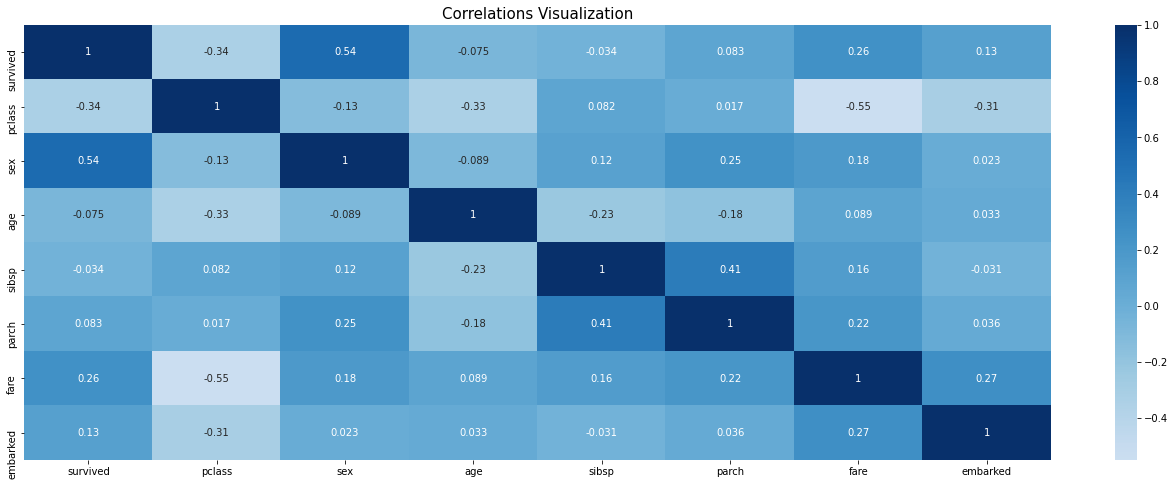

In [ ]:

#Visualzing the correlations in our dataset
plt.figure(figsize = (23, 8))
sns.heatmap(correlations, annot = True, center = 0,cmap="Blues")
plt.title('Correlations Visualization', fontsize = 15)
plt.show()

As the classes increase that is (1-3) the fare also increases thus having the negative correlation of -0.55. This means there is a relation between fare and pclass.
There is also a slight correlation between fare and family size of 0.22.
There is also a slight correlation between fare and one's survival of 0.26.
There is also a slight correlation of age and pclass. Meaning the aged individuals were better economically thus boarding on the first class.
There is also a correlation between one's survival and pclass. Meaning th well economic individuals were given priority.

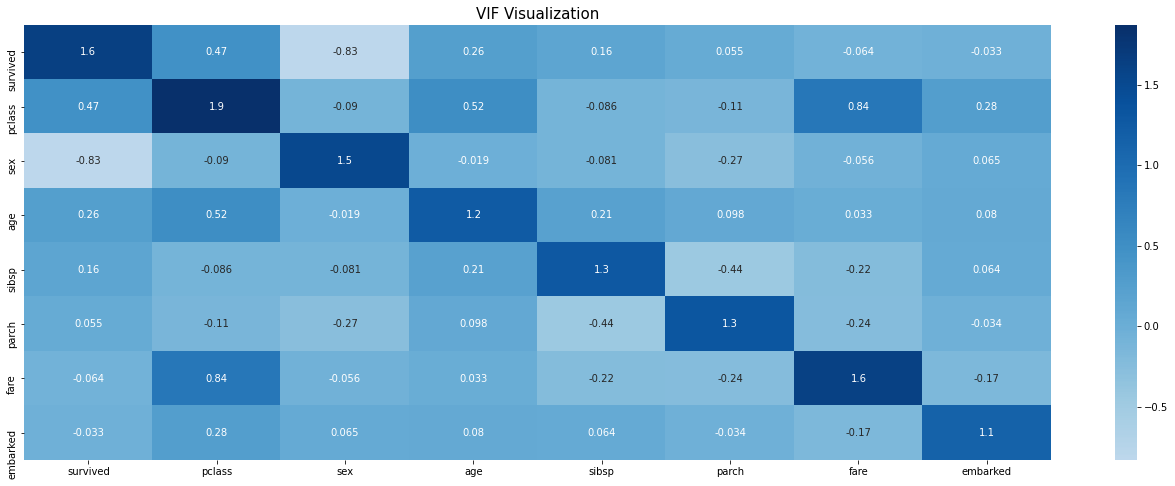

In [ ]:
#Visualzing the VIF Score

vif = pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns )
plt.figure(figsize = (23, 8))
sns.heatmap(vif, annot = True, center = 0, cmap="Blues")
plt.title('VIF Visualization', fontsize = 15)
plt.show()

There is no multi-collinearity in our independent variables.

##6. Implementing the solution KNN

The K Nearest Neighbors commonly known as the k-NN is a type of instance based learning, or lazy learning where the function is only approximated locally and all computation is deferred until function evaluation.

The k-NN is a non parametric method that does not make any assumptions of the underlying data distribution. Therefore we need no prior fitting or transformation of the data. But we will standardize our numerical columns for better analysis.

###Baseline Model - 80/20 split

Lets attempt to fit the data to the base model

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [ ]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Mean Absolute Error: 0.3539325842696629
Mean Squared Error: 0.3539325842696629
Root Mean Squared Error: 0.5949223346535772
The accuracy of the model is  0.6460674157303371

 Confusion matrix
[[80 25]
 [38 35]]

 Classification report
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       105
           1       0.58      0.48      0.53        73

    accuracy                           0.65       178
   macro avg       0.63      0.62      0.62       178
weighted avg       0.64      0.65      0.64       178



####KNN with Grid search Model - 80/20 split

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = KNeighborsClassifier(leaf_size = clf.best_params_['leaf_size'], n_neighbors = clf.best_params_['n_neighbors'], p = clf.best_params_['p'], metric = clf.best_params_['metric']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'leaf_size': 40, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}




             Actual  Predicted
PassengerId                   
15                0          1
160               0          0
764               1          1
742               0          1
484               1          0
...             ...        ...
887               0          0
674               1          0
183               0          0
633               1          0
142               1          1

[178 rows x 2 columns]


       Actual  Predicted
count  178.00     178.00
mean     0.41       0.37
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.33146067415730335
Mean Squared Error: 0.33146067415730335
Root Mean Squared Error: 0.5757262145823338
The accuracy of the model is  0.6685393258426966

 Confusion matrix
[[79 26]
 [33 40]]

 Classification report
              precision    recall  f1

###Baseline Model - 70/30 split

In [ ]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Mean Absolute Error: 0.3333333333333333
Mean Squared Error: 0.3333333333333333
Root Mean Squared Error: 0.5773502691896257
The accuracy of the model is  0.6666666666666666

 Confusion matrix
[[121  36]
 [ 53  57]]

 Classification report
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       157
           1       0.61      0.52      0.56       110

    accuracy                           0.67       267
   macro avg       0.65      0.64      0.65       267
weighted avg       0.66      0.67      0.66       267



####KNN with Grid search Model - 70/30 split

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_frame)
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

             Actual  Predicted
PassengerId                   
15                0          1
160               0          0
764               1          1
742               0          1
484               1          0
...             ...        ...
621               0          0
822               1          0
66                1          0
885               0          0
53                1          1

[267 rows x 2 columns]
Mean Absolute Error: 0.299625468164794
Mean Squared Error: 0.299625468164794
Root Mean Squared Error: 0.5473805515039734
The accuracy of the model is  0.700374531835206

 Confusion matrix
[[123  34]
 [ 46  64]]

 Classification report
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       157
           1       0.65      0.58      0.62       110

    accuracy                           0.70       267
   macro avg       0.69      0.68      0.68       267
weighted avg       0.70      0.70      0.70       267



###Baseline Model - 60/40 split

In [ ]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']


# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Mean Absolute Error: 0.32303370786516855
Mean Squared Error: 0.32303370786516855
Root Mean Squared Error: 0.5683605439025201
The accuracy of the model is  0.6769662921348315

 Confusion matrix
[[166  50]
 [ 65  75]]

 Classification report
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       216
           1       0.60      0.54      0.57       140

    accuracy                           0.68       356
   macro avg       0.66      0.65      0.65       356
weighted avg       0.67      0.68      0.67       356



####KNN with Grid search Model - 60/40 split

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch

modelthree = KNeighborsClassifier(leaf_size = clf.best_params_['leaf_size'], n_neighbors = clf.best_params_['n_neighbors'], p = clf.best_params_['p'], metric = clf.best_params_['metric']).fit(X_train, y_train)
modelthree

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1}




             Actual  Predicted
PassengerId                   
15                0          1
160               0          0
764               1          1
742               0          1
484               1          0
...             ...        ...
840               1          1
821               1          1
102               0          0
705               0          0
740               0          0

[356 rows x 2 columns]


       Actual  Predicted
count  356.00     356.00
mean     0.39       0.36
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.22752808988764045
Mean Squared Error: 0.22752808988764045
Root Mean Squared Error: 0.47699904600286197
The accuracy of the model is  0.7724719101123596

 Confusion matrix
[[181  35]
 [ 46  94]]

 Classification report
              precision    recal

###Baseline Model - Using the test data provided

In [ ]:
# convert the dataframe to a list
test_=test.values.tolist()

# predict using the test dataset
y_pred = modelthree.predict(test_)

#Adding the predicted values to our dataset
test['Survived'] = y_pred
test.sample(10)


,pclass,sex,age,sibsp,parch,fare,embarked,Survived
PassengerId,,,,,,,,
1052,3,1,30.27,0,0,7.73,0,1
1233,3,0,32.00,0,0,7.58,1,0
1095,2,1,8.00,1,1,26.00,1,1
1097,1,0,30.27,0,0,25.74,2,0
1003,3,1,30.27,0,0,7.78,0,1
926,1,0,30.00,1,0,57.75,2,1
1106,3,1,38.00,4,2,7.78,1,0
1004,1,1,36.00,0,0,31.68,2,1
1200,1,0,55.00,1,1,93.50,1,0


In [ ]:
test.Survived.value_counts()

0    296
1    121
Name: Survived, dtype: int64

##7. Conclusion

In [1]:
# Lets compare the performance of our different models

# initialize list of lists
data = ['Baseline Model 80/20 split',  0.3539325842696629, 0.3539325842696629, 0.5949223346535772, '64.6%'], ['with Grid search Model - 80/20 split', 0.33146067415730335, 0.33146067415730335, 0.5757262145823338, '66.9%'], ['Baseline Model 70/30 split',  0.3333333333333333, 0.3333333333333333, 0.5773502691896257, '67.0%'], ['with Grid search Model - 70/30 split', 0.299625468164794, 0.299625468164794, 0.5473805515039734, '70%'], ['Baseline Model 60/40 split',  0.32303370786516855, 0.32303370786516855, 0.5683605439025201, '67.7%'], ['with Grid search Model - 60/40 split', 0.22752808988764045, 0.22752808988764045, 0.47699904600286197, '77%']
 
# Create the pandas DataFrame

df = pd.DataFrame(data, columns = ['Model_Name','Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error','Accuracy'])
 
# print dataframe.
print(df )

NameError: ignored

In [2]:
Mean Absolute Error: 0.22752808988764045
Mean Squared Error: 0.22752808988764045
Root Mean Squared Error: 0.47699904600286197
The accuracy of the model is  0.7724719101123596

SyntaxError: ignored

In [ ]:
model_compare = pd.DataFrame(df )  #pd. DataFrame(np_array, columns=['Column1', 'Column2']) 
model_compare.set_index('Model_Name')

As per the table above, the best performing model was the Grid Search model with 60/40 train test split. scoring an accuracy of 77%

I was not able to achieve my metric of success of 80%. But my best model cuts closen at an accuracy of 77%.

The least performing model was the base model with the 80/20 Split. which is interesting cause I had expected that with a larger training dataset, the higher the accuracy you could expect

None of the models passed my metric of success of an accuracy level of above 80%
